Hypothesis: We believe there's a correlation between temperature and the incidence of crime in Silver Spring, Maryland


In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import datetime

In [2]:
# Save file path to variable
crimeMD_path = "Crime_MD.csv"
# silverspring_path = "silver_spring_climate.csv"

# Read with Pandas
crime_df = pd.read_csv(crimeMD_path, low_memory=False)
# silverspring_temp_df = pd.read_csv(silverspring_path)


In [3]:
# Save file path to variable
climateMD_path = "silver_spring_climate.csv"

# Read with Pandas
climate_df = pd.read_csv(climateMD_path, low_memory=False)
climate_df

,Month,Temp
0,January,43
1,February,46
2,March,55
3,April,66
4,May,76
5,June,84
6,July,88
7,August,87
8,September,80
9,October,68


In [4]:
# Formatting the month for merge later
climate_df.columns = ['MonthName','Temp']
df = pd.to_datetime(climate_df['MonthName'], format='%B').dt.month
climate_df['Month'] = df
climate_df

,MonthName,Temp,Month
0,January,43,1
1,February,46,2
2,March,55,3
3,April,66,4
4,May,76,5
5,June,84,6
6,July,88,7
7,August,87,8
8,September,80,9
9,October,68,10


In [5]:
# Pulling out only the columns of interest
main_crime_df = crime_df[['Crime Name1', 'Crime Name2', 'Crime Name3', 'City', 'Start_Date_Time']]

In [6]:
# Remove crimeless data and changing columns name 
main_crime_df = main_crime_df.loc[main_crime_df['Crime Name1'] != 'Not a Crime']
clean_crime_df = main_crime_df.rename(columns={'Crime Name1': 'Crime Main Category',
                                             'Crime Name2': 'Crime Sub Category',
                                             'Start_Date_Time': 'Date & Time of Crime'})

clean_crime_df['Date & Time of Crime']= pd.to_datetime(clean_crime_df['Date & Time of Crime'])
clean_crime_df['City'].value_counts()
silverspring_crime_df = clean_crime_df.loc[clean_crime_df['City'] == 'SILVER SPRING']
silverspring_crime_df

,Crime Main Category,Crime Sub Category,Crime Name3,City,Date & Time of Crime
0,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,SILVER SPRING,2019-01-16 15:51:00
2,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,SILVER SPRING,2019-11-28 06:08:00
8,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,SILVER SPRING,2017-07-01 00:00:00
11,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - SELL,SILVER SPRING,2019-01-07 20:00:00
20,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,SILVER SPRING,2019-09-17 15:30:00
...,...,...,...,...,...
212977,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - FORCED ENTRY-RESIDENTIAL,SILVER SPRING,2019-07-25 22:54:00
212981,Crime Against Property,All other Larceny,LARCENY (DESCRIBE OFFENSE),SILVER SPRING,2019-06-27 22:00:00
212983,Crime Against Property,Bad Checks,FRAUD - INSUFFICIENT FUNDS CHECK,SILVER SPRING,2019-06-21 16:30:00
212990,Other,All Other Offenses,POLICE INFORMATION,SILVER SPRING,2019-07-10 13:10:00


In [7]:
# Figure out the timeline of interest
data_first_date = silverspring_crime_df['Date & Time of Crime'].min()
data_last_date = silverspring_crime_df['Date & Time of Crime'].max()

print(data_first_date)
print(data_last_date)

# Throw away 2016 and 2020 
silverspring_clean_df = silverspring_crime_df.loc[(silverspring_crime_df['Date & Time of Crime'] > '2016-12-31 23:59:59') & (silverspring_crime_df['Date & Time of Crime'] < '2020-01-01 00:00:00')]

2016-07-01 00:00:00
2020-07-17 17:00:00


In [8]:
silverspring_clean_df

,Crime Main Category,Crime Sub Category,Crime Name3,City,Date & Time of Crime
0,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,SILVER SPRING,2019-01-16 15:51:00
2,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,SILVER SPRING,2019-11-28 06:08:00
8,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,SILVER SPRING,2017-07-01 00:00:00
11,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - SELL,SILVER SPRING,2019-01-07 20:00:00
20,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,SILVER SPRING,2019-09-17 15:30:00
...,...,...,...,...,...
212977,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - FORCED ENTRY-RESIDENTIAL,SILVER SPRING,2019-07-25 22:54:00
212981,Crime Against Property,All other Larceny,LARCENY (DESCRIBE OFFENSE),SILVER SPRING,2019-06-27 22:00:00
212983,Crime Against Property,Bad Checks,FRAUD - INSUFFICIENT FUNDS CHECK,SILVER SPRING,2019-06-21 16:30:00
212990,Other,All Other Offenses,POLICE INFORMATION,SILVER SPRING,2019-07-10 13:10:00


In [9]:
# Extract year from string format date
silverspring_clean_df['Year'] = pd.DatetimeIndex(silverspring_clean_df['Date & Time of Crime']).year
silverspring_clean_df['Month'] = pd.DatetimeIndex(silverspring_clean_df['Date & Time of Crime']).month

silverspring_clean_df.head(3)

C:\Users\ckuna\Anaconda3\envs\NewPythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ckuna\Anaconda3\envs\NewPythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Crime Main Category,Crime Sub Category,Crime Name3,City,Date & Time of Crime,Year,Month
0,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,SILVER SPRING,2019-01-16 15:51:00,2019,1
2,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,SILVER SPRING,2019-11-28 06:08:00,2019,11
8,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,SILVER SPRING,2017-07-01 00:00:00,2017,7


In [10]:
combined_df = pd.merge(silverspring_clean_df, climate_df, on='Month')
combined_df

,Crime Main Category,Crime Sub Category,Crime Name3,City,Date & Time of Crime,Year,Month,MonthName,Temp
0,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,SILVER SPRING,2019-01-16 15:51:00,2019,1,January,43
1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - SELL,SILVER SPRING,2019-01-07 20:00:00,2019,1,January,43
2,Crime Against Property,Destruction/Damage/Vandalism of Property,DAMAGE PROPERTY (DESCRIBE OFFENSE),SILVER SPRING,2018-01-10 22:00:00,2018,1,January,43
3,Other,All Other Offenses,POLICE INFORMATION,SILVER SPRING,2017-01-02 22:57:00,2017,1,January,43
4,Crime Against Property,Motor Vehicle Theft,AUTO THEFT - VEHICLE THEFT,SILVER SPRING,2019-01-28 09:09:00,2019,1,January,43
...,...,...,...,...,...,...,...,...,...
56722,Crime Against Society,All Other Offenses,FUGITIVE FROM JUSTICE (OUT OF STATE),SILVER SPRING,2019-02-20 22:29:00,2019,2,February,46
56723,Crime Against Property,Counterfeiting/Forgery,COUNTERFEITING,SILVER SPRING,2019-02-21 20:11:00,2019,2,February,46
56724,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,SILVER SPRING,2019-02-01 00:00:00,2019,2,February,46
56725,Crime Against Property,Extortion/Blackmail,EXTORTION (DESCRIBE OFFENSE),SILVER SPRING,2019-02-16 12:00:00,2019,2,February,46


In [11]:
# Dan's code starts here - Property/Other

In [12]:
# Separate Crime Against Property from other crimes
sspring_property = silverspring_clean_df.loc[(silverspring_clean_df['Crime Main Category'] == 'Crime Against Property')]
sspring_property

,Crime Main Category,Crime Sub Category,Crime Name3,City,Date & Time of Crime,Year,Month
0,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,SILVER SPRING,2019-01-16 15:51:00,2019,1
8,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,SILVER SPRING,2017-07-01 00:00:00,2017,7
20,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,SILVER SPRING,2019-09-17 15:30:00,2019,9
21,Crime Against Property,All other Larceny,LARCENY (DESCRIBE OFFENSE),SILVER SPRING,2018-12-04 17:30:00,2018,12
47,Crime Against Property,Destruction/Damage/Vandalism of Property,DAMAGE PROPERTY - PRIVATE,SILVER SPRING,2019-10-10 10:20:00,2019,10
...,...,...,...,...,...,...,...
212975,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,SILVER SPRING,2019-06-09 20:15:00,2019,6
212977,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - FORCED ENTRY-RESIDENTIAL,SILVER SPRING,2019-07-25 22:54:00,2019,7
212981,Crime Against Property,All other Larceny,LARCENY (DESCRIBE OFFENSE),SILVER SPRING,2019-06-27 22:00:00,2019,6
212983,Crime Against Property,Bad Checks,FRAUD - INSUFFICIENT FUNDS CHECK,SILVER SPRING,2019-06-21 16:30:00,2019,6


In [13]:
# Separate Property Crimes by Year
propcrime_2017 = sspring_property.loc[(sspring_property['Year'] == 2017)]
propcrime_2018 = sspring_property.loc[(sspring_property['Year'] == 2018)]
propcrime_2019 = sspring_property.loc[(sspring_property['Year'] == 2019)]

In [14]:
pc2017_x_axis = sorted(propcrime_2017['Month'])
pc2017_y_axis = propcrime_2017['Month'].value_counts()
pd.DataFrame(pc2017_y_axis) 

,Month
8,716
10,712
5,696
1,667
4,667
9,656
7,647
12,643
2,627
3,611


In [15]:
# Dan's code ends here

In [16]:
# Cynthia's code starts here - Person

Sub-Hypothesis: We believe that as temperature decreases to a certain point during the winter, the crime against person will also decreases. This is because people are less likely to come out during the winter time when it gets too cold, making crime occur less.


In [17]:
# Create Crime Against Person df
person_crime_df = silverspring_clean_df.loc[(silverspring_clean_df['Crime Main Category'] == 'Crime Against Person'), :]
person_crime_df

,Crime Main Category,Crime Sub Category,Crime Name3,City,Date & Time of Crime,Year,Month
2,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,SILVER SPRING,2019-11-28 06:08:00,2019,11
50,Crime Against Person,Aggravated Assault,ASSAULT - AGGRAVATED - OTHER,SILVER SPRING,2019-10-08 21:08:00,2019,10
131,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,SILVER SPRING,2018-10-01 00:00:00,2018,10
241,Crime Against Person,Fondling,SEX ASSAULT - FONDLING,SILVER SPRING,2019-08-18 12:00:00,2019,8
321,Crime Against Person,Simple Assault,ASSAULT - SIMPLE,SILVER SPRING,2019-10-15 00:25:00,2019,10
...,...,...,...,...,...,...,...
212889,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,SILVER SPRING,2019-06-30 10:41:00,2019,6
212935,Crime Against Person,Aggravated Assault,ASSAULT - AGGRAVATED - FAMILY-OTHER WEAPON,SILVER SPRING,2019-06-29 22:10:00,2019,6
212946,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,SILVER SPRING,2019-05-24 11:00:00,2019,5
212950,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,SILVER SPRING,2019-07-24 17:28:00,2019,7


In [18]:
# Using Groupby to get the # of crime incidence for each month
personmonthgroup = person_crime_df.groupby('Month')
personcrime_count_month = personmonthgroup['Month'].count()
personcrime_count_month

# Turn count of crime into a dataframe
personcrime_df = pd.DataFrame({'Number of Crime Incidence':personcrime_count_month})

# Drop the index to get month column, add month name 
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
personcrime_index_df = personcrime_df.reset_index(drop=True)
personcrime_index_df['Month'] = months
personcrime_index_df = personcrime_index_df[['Month','Number of Crime Incidence']]
personcrime_index_df

,Month,Number of Crime Incidence
0,January,384
1,February,362
2,March,434
3,April,404
4,May,439
5,June,442
6,July,405
7,August,404
8,September,471
9,October,416


In [19]:
# Summary Stats for Number of Crime Incidence from 2017-2020


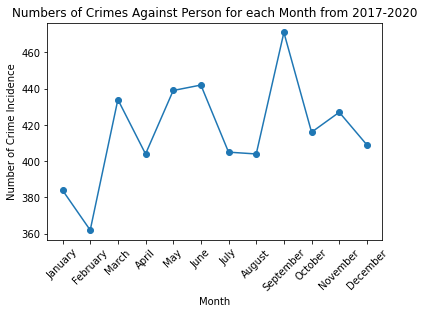

In [20]:
# Visualize the incidence of Crime Against Person for each month from 2017-2020
x_all = personcrime_index_df['Month']
y_all = personcrime_index_df['Number of Crime Incidence']

plt.plot(x_all, y_all, marker='o')
plt.xticks(rotation=45)

plt.xlabel('Month')
plt.ylabel('Number of Crime Incidence')
plt.title('Numbers of Crimes Against Person for each Month from 2017-2020')

plt.show()

In [21]:
## No corerlation when looking at crime rate collectively.... plot each year...?

person_crime_df

,Crime Main Category,Crime Sub Category,Crime Name3,City,Date & Time of Crime,Year,Month
2,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,SILVER SPRING,2019-11-28 06:08:00,2019,11
50,Crime Against Person,Aggravated Assault,ASSAULT - AGGRAVATED - OTHER,SILVER SPRING,2019-10-08 21:08:00,2019,10
131,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,SILVER SPRING,2018-10-01 00:00:00,2018,10
241,Crime Against Person,Fondling,SEX ASSAULT - FONDLING,SILVER SPRING,2019-08-18 12:00:00,2019,8
321,Crime Against Person,Simple Assault,ASSAULT - SIMPLE,SILVER SPRING,2019-10-15 00:25:00,2019,10
...,...,...,...,...,...,...,...
212889,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,SILVER SPRING,2019-06-30 10:41:00,2019,6
212935,Crime Against Person,Aggravated Assault,ASSAULT - AGGRAVATED - FAMILY-OTHER WEAPON,SILVER SPRING,2019-06-29 22:10:00,2019,6
212946,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,SILVER SPRING,2019-05-24 11:00:00,2019,5
212950,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,SILVER SPRING,2019-07-24 17:28:00,2019,7


In [22]:
# Create different df for different year (2017-2019)

person_crime_2017df = person_crime_df.loc[person_crime_df['Year'] == 2017]
person_crime_2018df = person_crime_df.loc[person_crime_df['Year'] == 2018]
person_crime_2019df = person_crime_df.loc[person_crime_df['Year'] == 2019]

In [23]:
# Number of crime in each month for 2017

personmonth2017 = person_crime_2017df.groupby('Month')
personcrime_ct_2017 = personmonth2017['Month'].count()

# Turn count of crime into a dataframe
personcrime_ct_2017df = pd.DataFrame({'Number of Crime Incidence':personcrime_ct_2017})

# Drop the index to get month column, add month name 
personcrime_ct_2017df = personcrime_ct_2017df.reset_index(drop=True)
personcrime_ct_2017df['Month'] = months
personcrime_ct_2017df = personcrime_ct_2017df[['Month','Number of Crime Incidence']]
personcrime_ct_2017df

,Month,Number of Crime Incidence
0,January,145
1,February,109
2,March,142
3,April,133
4,May,125
5,June,135
6,July,136
7,August,132
8,September,159
9,October,149


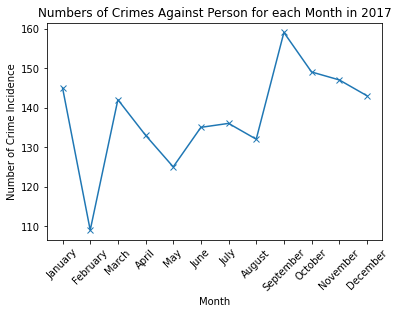

In [24]:
# Visualize the incidence of Crime Against Person for each month from 2017
x_2017 = personcrime_ct_2017df['Month']
y_2017 = personcrime_ct_2017df['Number of Crime Incidence']

handle17, = plt.plot(x_2017, y_2017, marker='x')
plt.xticks(rotation=45)

plt.xlabel('Month')
plt.ylabel('Number of Crime Incidence')
plt.title('Numbers of Crimes Against Person for each Month in 2017')

plt.show()

In [25]:
# Number of crime in each month for 2018

personmonth2018 = person_crime_2018df.groupby('Month')
personcrime_ct_2018 = personmonth2018['Month'].count()

# Turn count of crime into a dataframe
personcrime_ct_2018df = pd.DataFrame({'Number of Crime Incidence':personcrime_ct_2018})

# Drop the index to get month column, add month name 
personcrime_ct_2018df = personcrime_ct_2018df.reset_index(drop=True)
personcrime_ct_2018df['Month'] = months
personcrime_ct_2018df = personcrime_ct_2018df[['Month','Number of Crime Incidence']]
personcrime_ct_2018df

,Month,Number of Crime Incidence
0,January,129
1,February,129
2,March,156
3,April,131
4,May,168
5,June,158
6,July,129
7,August,148
8,September,165
9,October,135


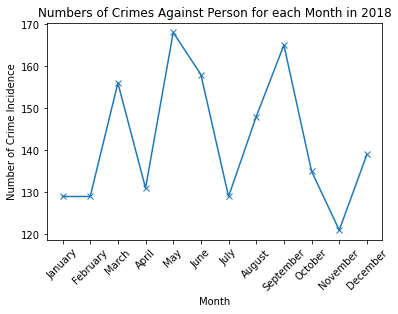

In [26]:
# Visualize the incidence of Crime Against Person for each month from 2018
x_2018 = personcrime_ct_2018df['Month']
y_2018 = personcrime_ct_2018df['Number of Crime Incidence']

handle18, = plt.plot(x_2018, y_2018, marker='x')
plt.xticks(rotation=45)

plt.xlabel('Month')
plt.ylabel('Number of Crime Incidence')
plt.title('Numbers of Crimes Against Person for each Month in 2018')

plt.show()

In [27]:
# Number of crime in each month for 2019

personmonth2019 = person_crime_2019df.groupby('Month')
personcrime_ct_2019 = personmonth2019['Month'].count()

# Turn count of crime into a dataframe
personcrime_ct_2019df = pd.DataFrame({'Number of Crime Incidence':personcrime_ct_2019})

# Drop the index to get month column, add month name 
personcrime_ct_2019df = personcrime_ct_2019df.reset_index(drop=True)
personcrime_ct_2019df['Month'] = months
personcrime_ct_2019df = personcrime_ct_2019df[['Month','Number of Crime Incidence']]
personcrime_ct_2019df

,Month,Number of Crime Incidence
0,January,110
1,February,124
2,March,136
3,April,140
4,May,146
5,June,149
6,July,140
7,August,124
8,September,147
9,October,132


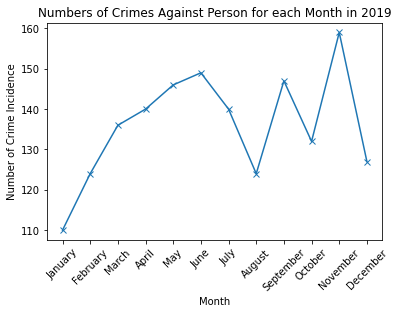

In [28]:
# Visualize the incidence of Crime Against Person for each month from 2019
x_2019 = personcrime_ct_2019df['Month']
y_2019 = personcrime_ct_2019df['Number of Crime Incidence']

handle19, = plt.plot(x_2019, y_2019, marker='x')
plt.xticks(rotation=45)

plt.xlabel('Month')
plt.ylabel('Number of Crime Incidence')
plt.title('Numbers of Crimes Against Person for each Month in 2019')

plt.show()

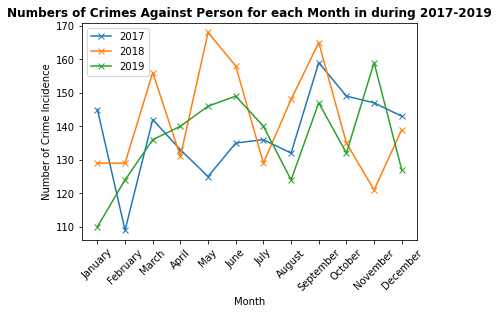

In [29]:
# Generate a facet plot of all 3 figures 

# Graph from 2017
handle17, = plt.plot(x_2017, y_2017, marker='x', label='2017')
# Graph from 2018
handle18, = plt.plot(x_2018, y_2018, marker='x', label='2018')
# Graph from 2019
handle19, = plt.plot(x_2019, y_2019, marker='x', label='2019')

plt.xticks(rotation=45)

plt.xlabel('Month')
plt.ylabel('Number of Crime Incidence')
plt.title('Numbers of Crimes Against Person for each Month in during 2017-2019', fontsize=12, fontweight='bold')

plt.legend(loc="best")
plt.show()

Generally, there seems to be lower indcidence of crime agaist person in January-February. Then crime incidence starts to increase in March and drops again around July-August before spikes again in September, before drops again in November or December.

In [30]:
# Dataframe of Number of Crime incidence for all the years
personcrime_ct_split_df =  pd.DataFrame({'2017 Count':personcrime_ct_2017,
                                        '2018 Count': personcrime_ct_2018,
                                        '2019 Count': personcrime_ct_2019})
personcrime_ct_split_df

,2017 Count,2018 Count,2019 Count
Month,,,
1,145,129,110
2,109,129,124
3,142,156,136
4,133,131,140
5,125,168,146
6,135,158,149
7,136,129,140
8,132,148,124
9,159,165,147


In [31]:
climate_df

,MonthName,Temp,Month
0,January,43,1
1,February,46,2
2,March,55,3
3,April,66,4
4,May,76,5
5,June,84,6
6,July,88,7
7,August,87,8
8,September,80,9
9,October,68,10


In [32]:
# Adding climate and crime analysis
personcrime_climate_df = pd.merge(personcrime_ct_split_df, climate_df, how='left', on='Month')
# Removing Month number column
del personcrime_climate_df['Month']
# Rename and re-organize the columns in the dataframe
personcrime_climate_df = personcrime_climate_df.rename(columns={
    'MonthName': 'Month', 'Temp': 'Temperature (F)'
})
personcrime_climate_df = personcrime_climate_df[['Month','2017 Count', '2018 Count', '2019 Count', 'Temperature (F)']]
personcrime_climate_df

,Month,2017 Count,2018 Count,2019 Count,Temperature (F)
0,January,145,129,110,43
1,February,109,129,124,46
2,March,142,156,136,55
3,April,133,131,140,66
4,May,125,168,146,76
5,June,135,158,149,84
6,July,136,129,140,88
7,August,132,148,124,87
8,September,159,165,147,80
9,October,149,135,132,68


In [38]:
# Create a New Dataframe for number of crimes in each month, indexed by year & month
personmonthyeargroup = person_crime_df.groupby(['Year','Month'])
personcrime_count_mmyy = personmonthyeargroup['Month'].count()
personcrime_count_mmyy_df = pd.DataFrame({'Number of Crime Incidence':personcrime_count_mmyy})

# Reset the index to allow further data anaylysis
personcrime_count_mmyy_df = personcrime_count_mmyy_df.reset_index(drop=False)
personcrime_count_mmyy_df

,Year,Month,Number of Crime Incidence
0,2017,1,145
1,2017,2,109
2,2017,3,142
3,2017,4,133
4,2017,5,125
5,2017,6,135
6,2017,7,136
7,2017,8,132
8,2017,9,159
9,2017,10,149


In [39]:
# Taking the average of the amount of crime for each month from 2017-2019
avgcrimepersongroup = personcrime_count_mmyy_df.groupby('Month')
avgcrime_person = avgcrimepersongroup['Number of Crime Incidence'].mean()

personcrime_avg_ct_df = pd.DataFrame({'Average Number of Crime (Person)':avgcrime_person})
personcrime_avg_ct_df = personcrime_avg_ct_df.reset_index(drop=False)
personcrime_avg_ct_df

,Month,Average Number of Crime (Person)
0,1,128.000000
1,2,120.666667
2,3,144.666667
3,4,134.666667
4,5,146.333333
5,6,147.333333
6,7,135.000000
7,8,134.666667
8,9,157.000000
9,10,138.666667


In [40]:
# Merge the average of crime df with climate df
avgcrime_person_temp_df = pd.merge(personcrime_avg_ct_df, climate_df, how='inner', on='Month')
avgcrime_person_temp_df

,Month,Average Number of Crime (Person),MonthName,Temp
0,1,128.000000,January,43
1,2,120.666667,February,46
2,3,144.666667,March,55
3,4,134.666667,April,66
4,5,146.333333,May,76
5,6,147.333333,June,84
6,7,135.000000,July,88
7,8,134.666667,August,87
8,9,157.000000,September,80
9,10,138.666667,October,68


In [41]:
# Removing Month number column
del avgcrime_person_temp_df['Month']

In [42]:
# Rename and re-organize the columns in the dataframe
avgcrime_person_temp_df = avgcrime_person_temp_df.rename(columns={
    'MonthName': 'Month', 'Temp': 'Temperature (F)'
})
avgcrime_person_temp_df = avgcrime_person_temp_df[['Month','Average Number of Crime (Person)', 'Temperature (F)']]

avgcrime_person_temp_df
# don't forget to come back here and sort it

,Month,Average Number of Crime (Person),Temperature (F)
0,January,128.000000,43
1,February,120.666667,46
2,March,144.666667,55
3,April,134.666667,66
4,May,146.333333,76
5,June,147.333333,84
6,July,135.000000,88
7,August,134.666667,87
8,September,157.000000,80
9,October,138.666667,68


The r value is: 0.501305162690757
The r-squared is: 0.2513068661404063


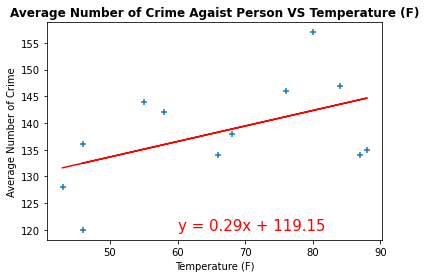

In [45]:
# Perform regression to look at average of crime and temperature
x_avgperson = avgcrime_person_temp_df['Temperature (F)']
y_avgperson = avgcrime_person_temp_df['Average Number of Crime (Person)'].astype(int)

plt.scatter(x_avgperson, y_avgperson, marker='+')

# Labels
plt.xlabel('Temperature (F)')
plt.ylabel('Average Number of Crime')
plt.title('Average Number of Crime Agaist Person VS Temperature (F)', fontsize=12, fontweight='bold')
# plt.legend(loc="best")

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_avgperson, y_avgperson)
regress_values = x_avgperson * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_avgperson,regress_values,"r-")
plt.annotate(line_eq,(60,120),fontsize=15,color="red")
print(f"The r value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

plt.show()

In [ ]:
# Cynthia's code ends here

In [ ]:
# Rose's code starts here - Society

In [ ]:
# Rose's code ends here

In [ ]:
# Paul's code starts here - API!!!

In [ ]:
# Paul's code ends here